In [1]:
# Data is retrieved from kaggle on 04.01.2022
# Data Link: https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information
# Market Analysis, Linear Regression, Data Visualization, Data Analysis


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 

In [4]:
data=pd.read_csv('C:/Users/Acer/Downloads/financials.csv')

In [5]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [7]:
data.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [8]:
data.corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price/Book,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000


In [9]:
NEW=data.groupby('Sector')

In [10]:
NEW.first()

,Symbol,Name,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Sector,,,,,,,,,,,,,
Consumer Discretionary,AAP,Advance Auto Parts,109.63,19.54,0.218321,6.19,169.550,78.8100,8.123612e+09,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
Consumer Staples,MO,Altria Group Inc,64.05,18.89,3.952688,5.31,77.790,60.0100,1.269851e+11,1.077300e+10,4.945682,10.32,http://www.sec.gov/cgi-bin/browse-edgar?action...
Energy,APC,Anadarko Petroleum Corp,56.20,-21.29,1.702997,-5.90,70.000,39.9600,3.212909e+10,3.115000e+09,3.968221,2.88,http://www.sec.gov/cgi-bin/browse-edgar?action...
Financials,AMG,Affiliated Managers Group Inc,179.11,12.24,0.638740,12.07,216.995,148.8100,1.044217e+10,1.261400e+09,4.591235,2.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
Health Care,ABT,Abbott Laboratories,56.27,22.51,1.908982,0.26,64.600,42.2800,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
Industrials,MMM,3M Company,222.89,24.31,2.332862,7.92,259.770,175.4900,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
Information Technology,ACN,Accenture plc,150.51,25.47,1.714470,5.44,162.600,114.8200,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
Materials,APD,Air Products & Chemicals Inc,152.80,24.22,2.781114,13.66,175.170,133.6301,3.463839e+10,2.542500e+09,4.116368,3.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
Real Estate,ARE,Alexandria Real Estate Equities Inc,114.58,19.03,3.026227,1.57,134.370,106.8900,1.204337e+10,0.000000e+00,10.492155,2.07,http://www.sec.gov/cgi-bin/browse-edgar?action...


<AxesSubplot:xlabel='Sector', ylabel='Earnings/Share'>

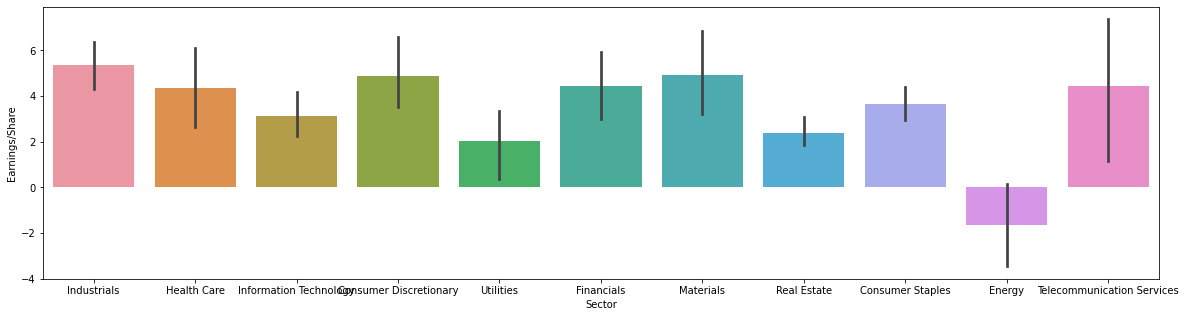

In [11]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x='Sector',y='Earnings/Share',data=data)


<AxesSubplot:xlabel='Sector', ylabel='Price'>

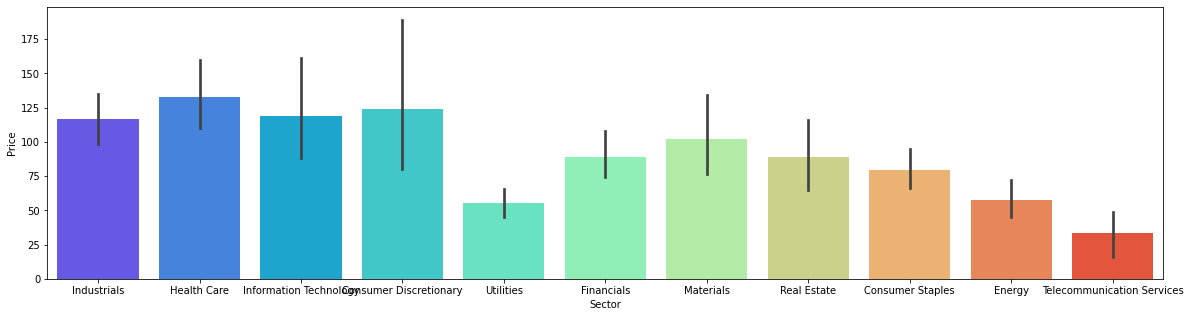

In [12]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x='Sector',y='Price',data=data,palette='rainbow')

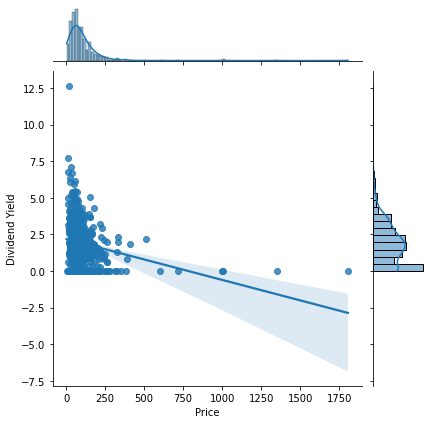

In [13]:
sns.jointplot(x='Price',y='Dividend Yield',data=data,kind='reg')

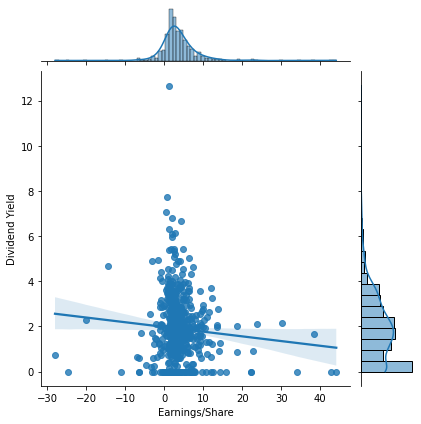

In [14]:
sns.jointplot(x='Earnings/Share',y='Dividend Yield',data=data,kind='reg')

<AxesSubplot:xlabel='Sector', ylabel='count'>

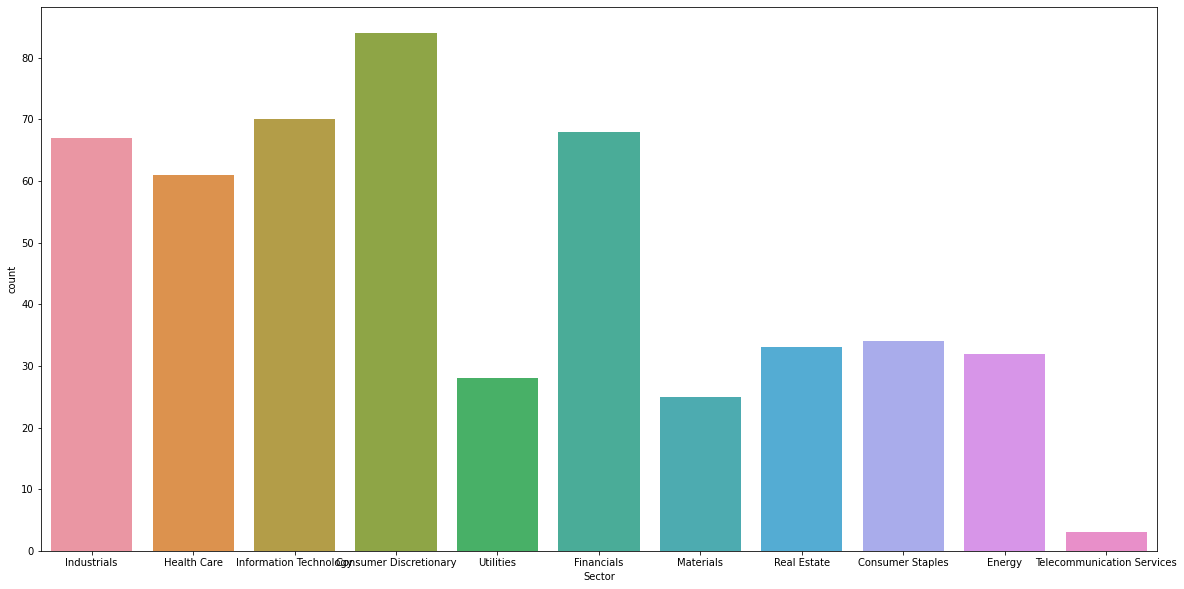

In [15]:
fig=plt.figure(figsize=(20,10))
sns.countplot(x='Sector',data=data)

In [16]:
data['Price/Share']=data['Price/Earnings']*data['Earnings/Share']

In [17]:
data.head(1)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Price/Share
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,192.5352


In [18]:
import cufflinks as cf 

In [19]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
newdata=data.drop(['Symbol','SEC Filings','52 Week High','52 Week Low','Name','Sector','Price/Share','Market Cap','EBITDA'],axis=1)
newdata.iplot()

In [21]:
data['Number of Shares Outstanding']=data['Market Cap']/data['Price']

In [22]:
X=data[['Earnings/Share','EBITDA','Dividend Yield','Number of Shares Outstanding','52 Week High','52 Week Low']]
y=data['Price']

In [23]:
data.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Price/Share,Number of Shares Outstanding
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,192.5352,6.223745e+08
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,47.1920,1.790076e+08
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.8526,1.814840e+09
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,63.8589,1.672072e+09
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,138.5568,6.562079e+08
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,5.251867e+10,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...,40.7040,7.977923e+08
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6.242378e+09,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...,135.3746,4.292949e+07
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,9.455021e+10,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...,177.3309,5.106406e+08
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.810,8.123612e+09,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...,120.9526,7.410026e+07
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,1.119166e+10,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.6100,9.974745e+08


In [24]:
data[['Number of Shares Outstanding','Price']].corr()

,Number of Shares Outstanding,Price
Number of Shares Outstanding,1.0000,-0.1167
Price,-0.1167,1.0000


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lm.intercept_)

-2.2403517195701


In [31]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Earnings/Share,-2.416472e-02
EBITDA,2.673882e-11
Dividend Yield,-2.109340e-01
Number of Shares Outstanding,4.781055e-10
52 Week High,3.776939e-02
52 Week Low,8.406483e-01


In [32]:
predictions=lm.predict(X_test)

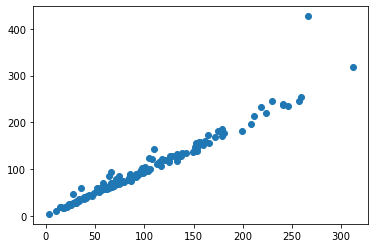

In [33]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.227356382653826
MSE: 227.0316064720871
RMSE: 15.067568034427026
